In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
# Load datasets
sales_df = pd.read_csv("sales_data.csv")
customers_df = pd.read_csv("customer_data.csv")
inventory_df = pd.read_csv("vehicle_inventory.csv")
dealers_df = pd.read_csv("dealer_performance.csv")
marketing_df = pd.read_csv("marketing_campaigns.csv")

print(" Data Loaded Successfully!")


 Data Loaded Successfully!


In [13]:
# Ensure copies are made to avoid modification issues
sales_df = sales_df.copy()
customers_df = customers_df.copy()
inventory_df = inventory_df.copy()
marketing_df = marketing_df.copy()

# Fill missing values with meaningful replacements
sales_df["Sale_Price"] = sales_df["Sale_Price"].fillna(sales_df["Sale_Price"].median())
customers_df["Age"] = customers_df["Age"].fillna(customers_df["Age"].median())

# Handle missing city values
sales_with_cities = sales_df.merge(customers_df, on="Customer_ID", how="left")
sales_with_cities["City"] = sales_with_cities["City"].fillna(sales_with_cities["Dealership_Location"])

customers_df["City"] = customers_df["City"].fillna(
    sales_with_cities.groupby("Customer_ID")["City"].first()
)

most_common_city = customers_df["City"].mode()[0]
customers_df["City"] = customers_df["City"].fillna(most_common_city)

inventory_df["Stock_Level"] = inventory_df["Stock_Level"].fillna(inventory_df["Stock_Level"].median())
marketing_df["Success_Rate"] = marketing_df["Success_Rate"].fillna(marketing_df["Success_Rate"].mean())

# Convert date column to datetime format
sales_df["Date"] = pd.to_datetime(sales_df["Date"], errors='coerce')

print(" Data Cleaning Completed!")


 Data Cleaning Completed!


In [14]:
# Merge sales with customer data for analysis
merged_sales = sales_df.merge(customers_df, on="Customer_ID", how="left")

print(" Merging Completed!")


 Merging Completed!


C:\Users\Ejiro\AppData\Local\Temp\ipykernel_10436\946149390.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Vehicle_Model", y="Sale_Price", data=top_cars, palette="viridis")


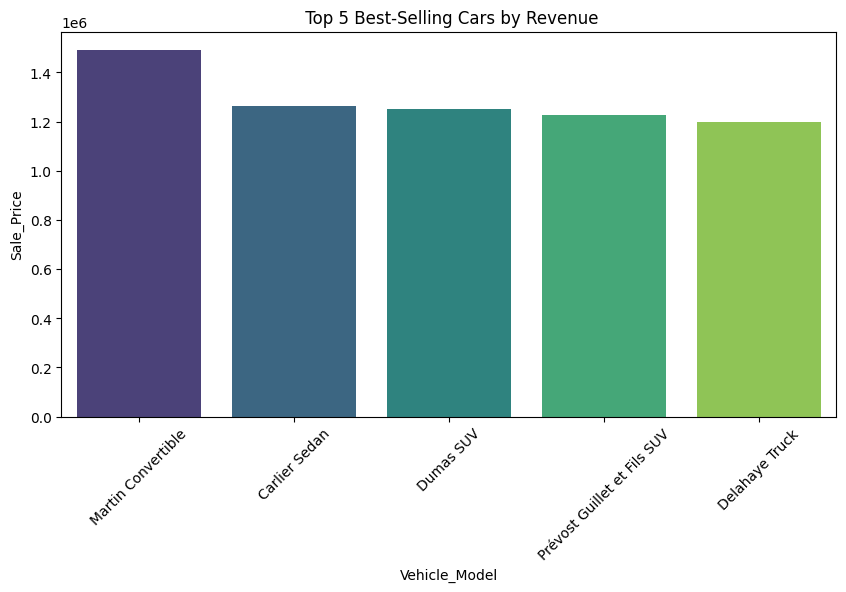

In [15]:
top_cars = sales_df.groupby("Vehicle_ID")["Sale_Price"].sum().sort_values(ascending=False).head(5)
top_cars = top_cars.reset_index().merge(inventory_df, on="Vehicle_ID", how="left")

plt.figure(figsize=(10, 5))
sns.barplot(x="Vehicle_Model", y="Sale_Price", data=top_cars, palette="viridis")
plt.xticks(rotation=45)
plt.title(" Top 5 Best-Selling Cars by Revenue")
plt.show()


C:\Users\Ejiro\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ejiro\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ejiro\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


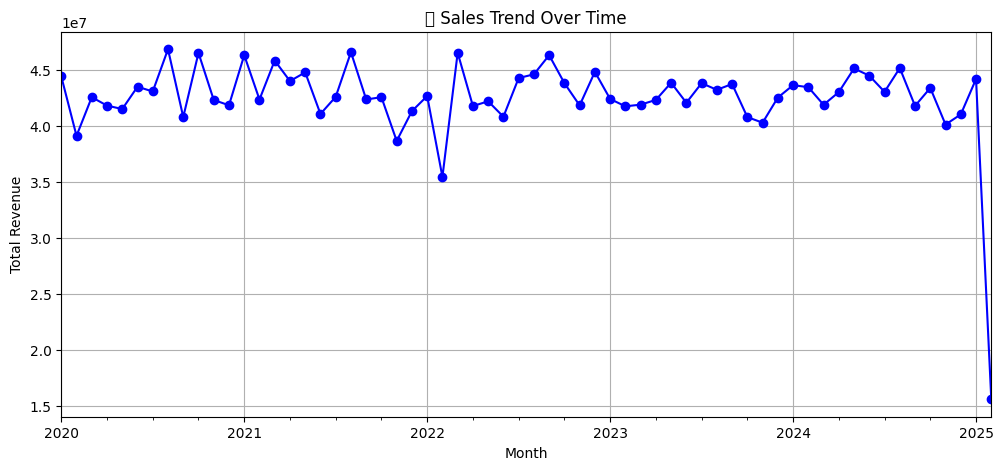

In [16]:
sales_trend = sales_df.groupby(sales_df["Date"].dt.to_period("M"))["Sale_Price"].sum()

plt.figure(figsize=(12, 5))
sales_trend.plot(kind="line", marker="o", color="blue")
plt.title("📊 Sales Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()


C:\Users\Ejiro\AppData\Local\Temp\ipykernel_10436\2616722849.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Vehicle_Model", y="Sale_Price", data=least_cars, palette="coolwarm")


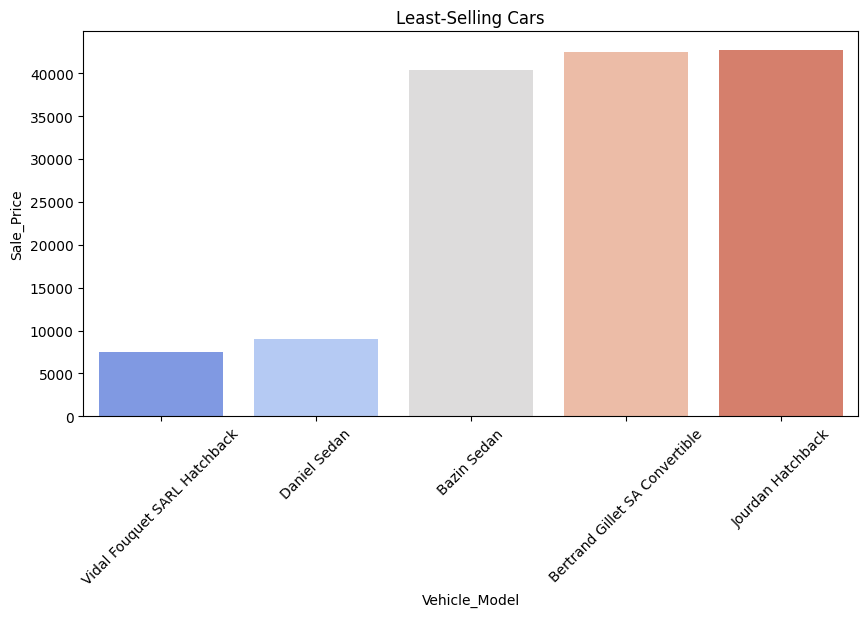

In [17]:
least_cars = sales_df.groupby("Vehicle_ID")["Sale_Price"].sum().sort_values(ascending=True).head(5)
least_cars = least_cars.reset_index().merge(inventory_df, on="Vehicle_ID", how="left")

plt.figure(figsize=(10, 5))
sns.barplot(x="Vehicle_Model", y="Sale_Price", data=least_cars, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Least-Selling Cars")
plt.show()


C:\Users\Ejiro\AppData\Local\Temp\ipykernel_10436\2031972789.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Vehicle_ID", y="Sale_Price", data=expensive_cars, palette="plasma")
C:\Users\Ejiro\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128178 (\N{HEAVY DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


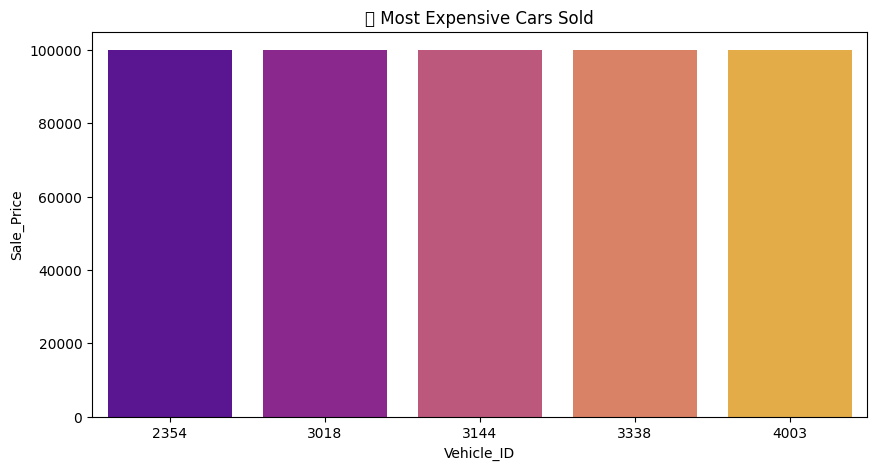

In [18]:
expensive_cars = sales_df.sort_values(by="Sale_Price", ascending=False).head(5)

plt.figure(figsize=(10, 5))
sns.barplot(x="Vehicle_ID", y="Sale_Price", data=expensive_cars, palette="plasma")
plt.title("💲 Most Expensive Cars Sold")
plt.show()


C:\Users\Ejiro\AppData\Local\Temp\ipykernel_10436\1211880338.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette="magma")


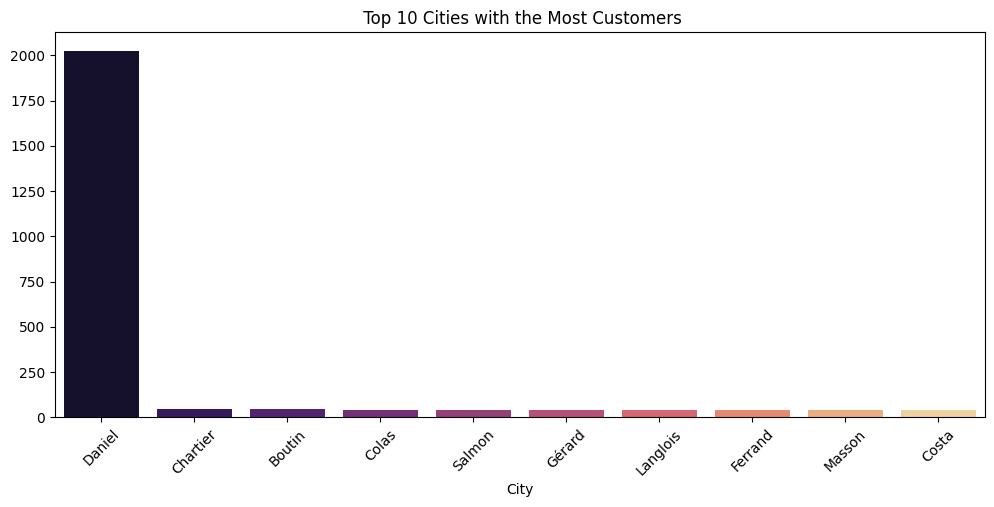

C:\Users\Ejiro\AppData\Local\Temp\ipykernel_10436\1211880338.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette="magma")
C:\Users\Ejiro\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


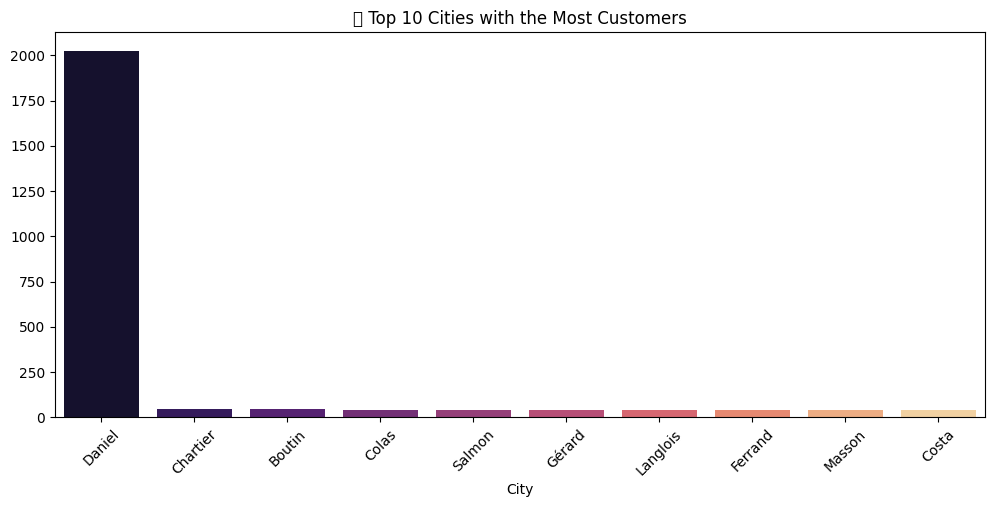

In [19]:
city_counts = customers_df["City"].value_counts().head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=city_counts.index, y=city_counts.values, palette="magma")
plt.xticks(rotation=45)
plt.title(" Top 10 Cities with the Most Customers")
plt.show()
city_counts = customers_df["City"].value_counts().head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=city_counts.index, y=city_counts.values, palette="magma")
plt.xticks(rotation=45)
plt.title("📍 Top 10 Cities with the Most Customers")
plt.show()


C:\Users\Ejiro\AppData\Local\Temp\ipykernel_10436\3897529405.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Dealership_Name", y="Total_Cars_Sold", data=best_dealers, palette="summer")


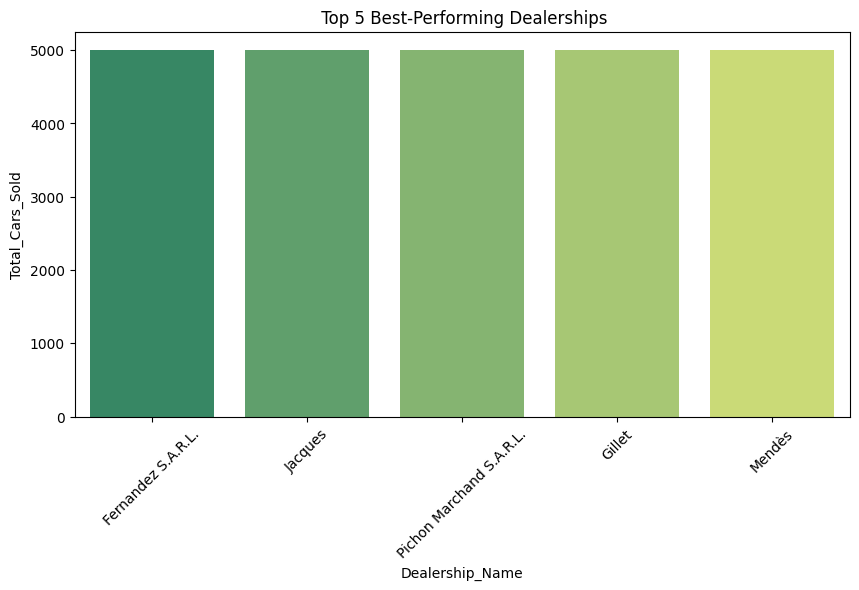

C:\Users\Ejiro\AppData\Local\Temp\ipykernel_10436\3897529405.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Dealership_Name", y="Total_Cars_Sold", data=worst_dealers, palette="autumn")


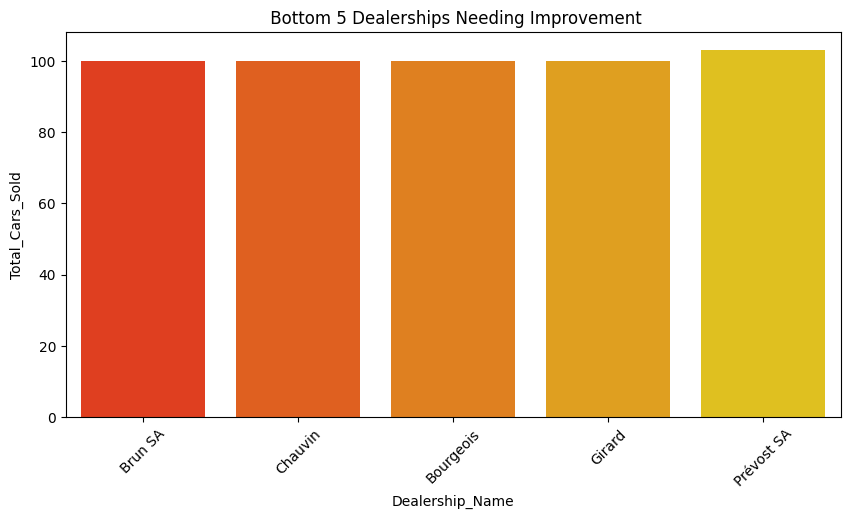

In [20]:
best_dealers = dealers_df.sort_values(by="Total_Cars_Sold", ascending=False).head(5)
worst_dealers = dealers_df.sort_values(by="Total_Cars_Sold", ascending=True).head(5)

plt.figure(figsize=(10, 5))
sns.barplot(x="Dealership_Name", y="Total_Cars_Sold", data=best_dealers, palette="summer")
plt.xticks(rotation=45)
plt.title(" Top 5 Best-Performing Dealerships")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x="Dealership_Name", y="Total_Cars_Sold", data=worst_dealers, palette="autumn")
plt.xticks(rotation=45)
plt.title(" Bottom 5 Dealerships Needing Improvement")
plt.show()


C:\Users\Ejiro\AppData\Local\Temp\ipykernel_10436\3086547090.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Campaign_Type", y="Success_Rate", data=marketing_df, palette="pastel")


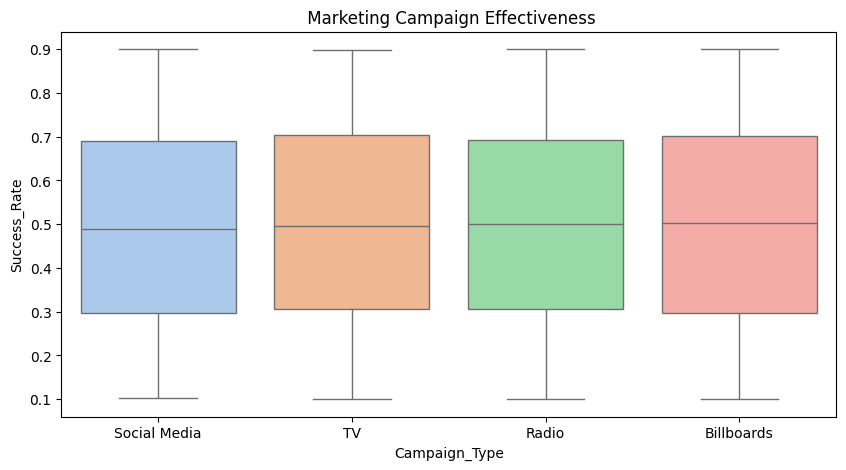

In [22]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Campaign_Type", y="Success_Rate", data=marketing_df, palette="pastel")
plt.title(" Marketing Campaign Effectiveness")
plt.show()


In [24]:
print("\n Key Business Insights for LeMoteur Inc. \n")

print(f" Best-selling car models: {top_cars['Vehicle_Model'].tolist()}. Focus on increasing stock and marketing these models.")
print(f" Worst-selling cars: {least_cars['Vehicle_Model'].tolist()}. Consider discounts or discontinuation.")
print(f" Sales trends show peak months: {sales_trend.idxmax()} with the highest revenue. Adjust inventory accordingly.")
print(f" Luxury cars (most expensive sales) should target high-income customers.")
print(f" Best dealership locations: {best_dealers['Dealership_Name'].tolist()}. Expand business in these areas.")
print(f" Top customer locations: {city_counts.index.tolist()}. Prioritize marketing in these cities.")
print(f" The most successful marketing campaigns are {marketing_df.groupby('Campaign_Type')['Success_Rate'].mean().idxmax()}. Invest more in these channels.")

print("\n Analysis & Visualizations Completed!")



 Key Business Insights for LeMoteur Inc. 

 Best-selling car models: ['Martin Convertible', 'Carlier Sedan', 'Dumas SUV', 'Prévost Guillet et Fils SUV', 'Delahaye Truck']. Focus on increasing stock and marketing these models.
 Worst-selling cars: ['Vidal Fouquet SARL Hatchback', 'Daniel Sedan', 'Bazin Sedan', 'Bertrand Gillet SA Convertible', 'Jourdan Hatchback']. Consider discounts or discontinuation.
 Sales trends show peak months: 2020-08 with the highest revenue. Adjust inventory accordingly.
 Luxury cars (most expensive sales) should target high-income customers.
 Best dealership locations: ['Fernandez S.A.R.L.', 'Jacques', 'Pichon Marchand S.A.R.L.', 'Gillet', 'Mendès']. Expand business in these areas.
 Top customer locations: ['Daniel', 'Chartier', 'Boutin', 'Colas', 'Salmon', 'Gérard', 'Langlois', 'Ferrand', 'Masson', 'Costa']. Prioritize marketing in these cities.
 The most successful marketing campaigns are TV. Invest more in these channels.

 Analysis & Visualizations Compl